**Linear Regression (LR : y = a*b + c )** - the core structureof DL. Later, I can use this structure and frame to solve further DL problems. Here, I have to understand difference between BIAS and WEIGHT : y = a*b + c : here C is Bias which can backward or toward my function but A is Weight which is increase or decrease my function value.

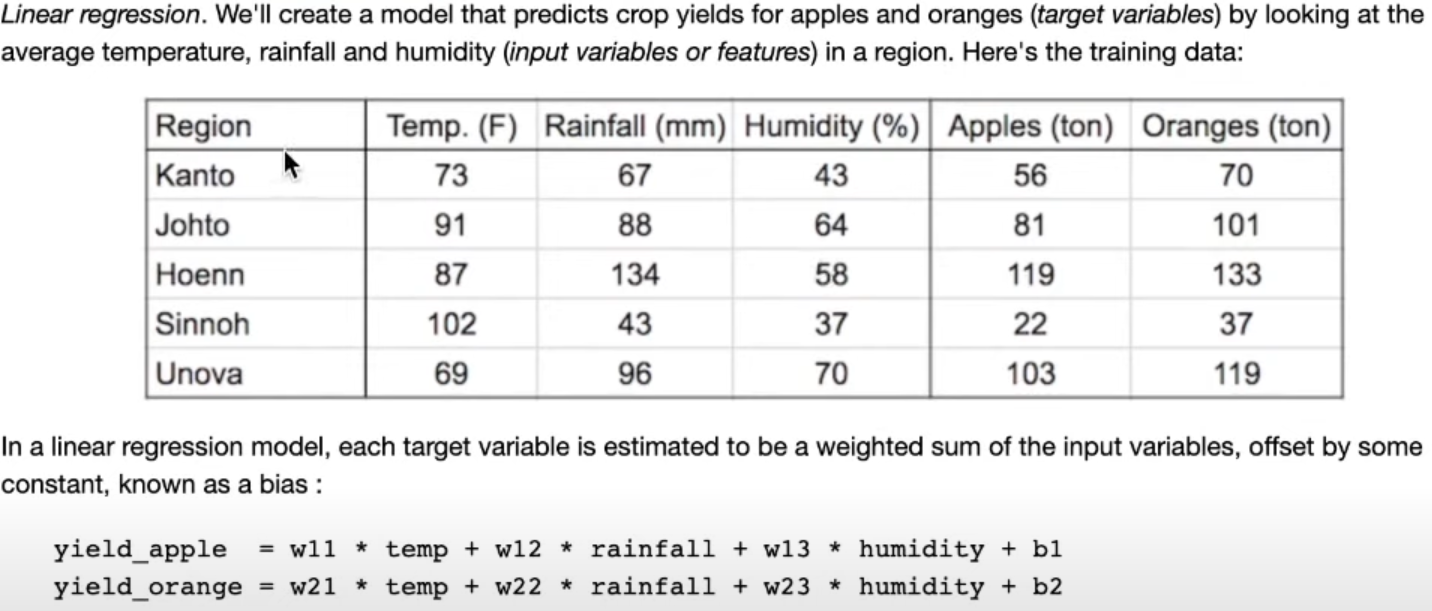

In [199]:
import torch
import numpy as np

# data for my Temp, Rainfall, Humanidity

features = np.array([[73,67,43],
                 [91,88,64],
                 [87,134,58],
                 [102,43,37],
                 [69,96,70]], dtype = 'float32')

# enter my target values
gt = np.array([[56,70],
               [81,101],
               [119,133],
               [22,37],
               [103,119]], dtype = 'float32')



# **Convert my array into Tensors**

In [200]:
features_tensor = torch.from_numpy(features)
gt_tensor = torch.from_numpy(gt)
print(f'Features : {features_tensor} \n GT : {gt_tensor}.' )

Features : tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]]) 
 GT : tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]]).


In [201]:
# If i check, there is 2 rows and 3 cols in Weight and in Bias there is 2 rows and 1 col. So I don't their value.
# 2 rows for one is for apple and one is for orange. And 3 cols for features in Weight
w = torch.randn(2,3, requires_grad = True)
b = torch.randn(2, requires_grad = True)
# randn : usually print value 1 to -1 but sometimes it may be slightly higher
print(w , b)

tensor([[ 1.0223,  0.1908,  0.1143],
        [ 1.6943, -1.9174,  0.4605]], requires_grad=True) tensor([0.4671, 0.5562], requires_grad=True)


### **Starting our Model**
**X** : 5(row) by 3(col) matrix * **W** 3(rows) by 2(col) matrix and **Result** is 5(row) by 2 (col) **Matrix**.

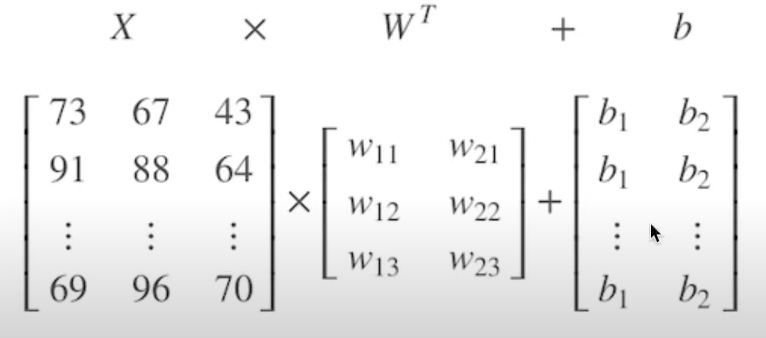

In [202]:
def my_model(x):
  return x @ w.t() + b


In matrix operation, '@' can be use as a multipilication and '.t' transpose (). Becase originally, my w is 2 by 3 matrix. But in order to multiply two matrix the first matrix last digit and next matrix first digit have to match eat other. It was X is (5 x 3) but W is (2 x 3) so to match X value , we used .t  which is transpose.

In [203]:
preds = my_model(features_tensor) # we have to define the model name and pass our data to check predictions
preds # these values what I get because of my prediction 

tensor([[ 92.7946,  15.5722],
        [117.6039,  15.4735],
        [121.6074, -82.2656],
        [117.1740, 107.9599],
        [ 97.3269, -34.3763]], grad_fn=<AddBackward0>)

In [204]:
print(gt_tensor) # what is the actual values

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


**Loss Function** : After applying the model, we can see alot of differences between predicted value and GT_tensor. So we have to improve our model, but before improving it, we have to evaluate how well our model is improving. To check it we can do :    
  1.  ` Calculate` difference between preds - **gt** 
  2.  `Square all elements` to remove negative values.
  3.  `Calculate the avarage` of the elements in the resulting matrix.



In [205]:
diff = preds - gt_tensor
diff # 1st step

tensor([[  36.7946,  -54.4278],
        [  36.6039,  -85.5265],
        [   2.6074, -215.2656],
        [  95.1740,   70.9599],
        [  -5.6731, -153.3763]], grad_fn=<SubBackward0>)

In [206]:
diff_sqr = diff * diff
diff_sqr # 2nd step

tensor([[1.3538e+03, 2.9624e+03],
        [1.3398e+03, 7.3148e+03],
        [6.7983e+00, 4.6339e+04],
        [9.0581e+03, 5.0353e+03],
        [3.2184e+01, 2.3524e+04]], grad_fn=<MulBackward0>)

In [207]:
diff_avarage = torch.sum(diff_sqr) / diff.numel()
diff_avarage # 3rd step

tensor(9696.6807, grad_fn=<DivBackward0>)

**These 3 steps** : can combine and make **mean squared error** (MSE)

In [208]:
# Mean Square Error : 

def MSE_model(my_pred, my_gt):
  diff = my_pred - my_gt
  return torch.sum(diff * diff) / diff.numel() # .numel can be use to count elements in matrix

In [209]:
# Calculate my LOSS :

loss_value = MSE_model(preds, gt_tensor)
print(loss_value)


tensor(9696.6807, grad_fn=<DivBackward0>)


**tensor(120121.2109, grad_fn=<DivBackward0>)** means SQRT(120121.2109) =  **346.584766** which means I am **346** far away from my expected value.

**Compute Gradients :** In python, we can use requires_grad = True in order to get gredient or .backward()

In [210]:


print(w) # actual WEIGHT value
print(w.grad) # geting WEIGHT value derivative

tensor([[ 1.0223,  0.1908,  0.1143],
        [ 1.6943, -1.9174,  0.4605]], requires_grad=True)
None


In [211]:
preds = my_model(features_tensor)
print(preds)

tensor([[ 92.7946,  15.5722],
        [117.6039,  15.4735],
        [121.6074, -82.2656],
        [117.1740, 107.9599],
        [ 97.3269, -34.3763]], grad_fn=<AddBackward0>)


In [212]:
loss_value.backward()
print(w.grad)
print(b.grad)

tensor([[  3112.0203,   1916.7260,   1440.0728],
        [ -6765.8599, -10338.2871,  -5682.0640]])
tensor([ 33.1013, -87.5273])


In [220]:
# Adjust W/ reset gradients

with torch.no_grad():
  w -= w.grad * 0.001
  b -= b.grad * 0.001
  w.grad.zero_()
  b.grad.zero_()


In [214]:
print(w)
print(b)

tensor([[-2.0898, -1.7259, -1.3257],
        [ 8.4601,  8.4209,  6.1425]], requires_grad=True)
tensor([0.4340, 0.6437], requires_grad=True)


In [224]:
preds = my_model(features_tensor)
loss = MSE_model(preds, gt_tensor)
print(loss)


tensor(nan, grad_fn=<DivBackward0>)


Here, we can optimize the loss function and predict the value, but there is another way to optimize the loss function by using the train loop **epoch**

In [216]:
for i in range (100):
  preds = my_model(features_tensor)
  loss = MSE_model(preds, gt_tensor)
  loss.backward()

  with torch.no_grad():
    w -= w.grad * 0.001
    b -= b.grad * 0.001
    w.grad.zero_()
    b.grad.zero_()

In [225]:
preds = my_model(features_tensor)
loss = (preds, gt_tensor)
# beacuse of the --version the output may be 'Nan' or wrong
